<a href="https://colab.research.google.com/github/carinanorre/BraTS-Dissertation/blob/master/Copy_of_SupernovaBay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install corner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import corner
from scipy.constants import c
import matplotlib.pyplot as plt
from pylab import genfromtxt
import random as rn
import urllib
from matplotlib import cm

In [ ]:
def eta(a, Om):
  s = ((1-Om)/Om)**(1/3)
  return 2*np.sqrt(s**3+1)*((1/a**4)-0.1540*(s/a**3)+0.4304*(s**2/a**2)+0.19097*(s**3/a)+0.066941*s**4)**(-1/8)

def DL(z, Om, h):
  H0 = 100*h
  return (c*1e-3)/H0*(1+z)*(eta(1,Om)-eta(1/(1+z),Om))

def Mu(z, Om, h):
  return 25-5*np.log10(h)+5*np.log10(DL(z,Om,1))

In [ ]:
!wget "https://raw.githubusercontent.com/hussahalghanem/supernovae/main/jla_mub.txt"
!wget "https://raw.githubusercontent.com/hussahalghanem/supernovae/main/jla_mub_covmatrix.txt"
f=genfromtxt("jla_mub.txt")

z=f[:,0]
mu=f[:,1]



--2022-09-16 11:54:24--  https://raw.githubusercontent.com/hussahalghanem/supernovae/main/jla_mub.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 619 [text/plain]
Saving to: ‘jla_mub.txt.1’

jla_mub.txt.1       100%[===================>]     619  --.-KB/s    in 0s      

2022-09-16 11:54:24 (20.5 MB/s) - ‘jla_mub.txt.1’ saved [619/619]

--2022-09-16 11:54:24--  https://raw.githubusercontent.com/hussahalghanem/supernovae/main/jla_mub_covmatrix.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17203 (17K) [text/plain]
Saving t

In [ ]:
#C=np.loadtxt("jla_mub_covmatrix.txt").reshape(31,31)
#C_inverse = np.linalg.inv(C)

In [ ]:
def loglike(z,Om,h,mu,C_inverse):

  logl = np.dot(mu-Mu(z,Om,h),(np.dot(C_inverse,mu-Mu(z,Om,h))))

  return -logl/2

In [ ]:
def Metropolis(Om0,h0,s = 600,sigma=0.001):
  #Omstar=0.3
  #hstar=0.5
  C=np.loadtxt("jla_mub_covmatrix.txt").reshape(31,31)
  C_inverse = np.linalg.inv(C)

  Omstar=Om0
  hstar=h0
  Omf=[Omstar]
  hf=[hstar]
  Om=[]
  h=[]
  lfs = []
  count=0
  for n in range(s):
    #mean=[Omstar,hstar]
    #cov=np.ones((2,2))
    #r=np.random.multivariate_normal(mean, cov, size=2)
    post0=loglike(z,Omstar,hstar,mu,C_inverse)

    rh=np.random.normal(hstar,sigma)
    rOm=np.random.normal(Omstar,sigma)

    post=loglike(z,rOm,rh,mu,C_inverse)

    postar=post0
    diff=post - post0
    if diff>=0:
      Omstar=rOm
      hstar=rh
      postar=post
      count +=1
    else:
      r=rn.random()
      if np.log(r) <= diff:
        Omstar=rOm
        hstar=rh
        postar=post
        count +=1
    Omf.append(Omstar)
    hf.append(hstar)
    lfs.append(postar)



    #plt.xlim(0, 1)
    #plt.ylim(0, 1)

  accept = count/s



  return Omf, hf, accept, lfs

Text(0, 0.5, 'h')

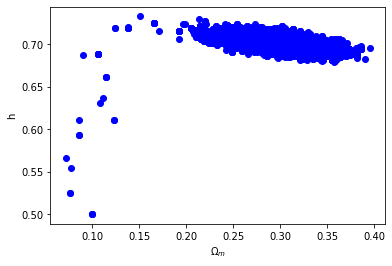

In [ ]:
Omf, hf, accept,lfs = Metropolis(0.1,0.5,s = 10000,sigma=0.018)
plt.plot(Omf,hf,'bo')
plt.xlabel('$\Omega_m$')
plt.ylabel('h')

In [ ]:
chains = 4
Om_init = []
h_init = []
for i in range(chains):
  Om_init.append(rn.random())
  h_init.append(rn.random())

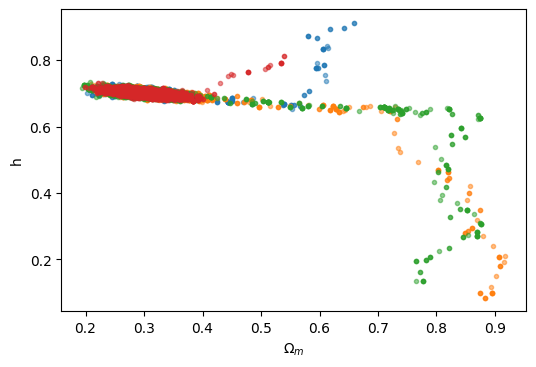

In [ ]:
plt.figure(dpi=100)
plt.xlabel('$\Omega_m$')
plt.ylabel('h')

for i in range(chains):
  Omf, hf, accept,lfs = Metropolis(Om_init[i],h_init[i],s=10000,sigma=0.018)
  plt.plot(Omf,hf,linestyle='None',marker='.',alpha=.5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in less_equal


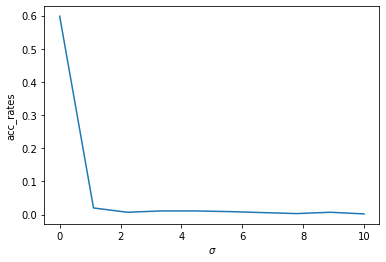

In [ ]:
sig_arr = np.linspace(0.0001,10,10)
acc_rates = []
for sig in sig_arr:
  acc_rates.append(Metropolis(0.1,0.3,s=1000, sigma=sig)[2])
plt.plot(sig_arr,acc_rates)
plt.ylabel('acc_rates')
plt.xlabel('$\sigma$')
plt.show()

In [ ]:
Omf, hf, accept, lfs = Metropolis(0.1,0.5,s = 10000,sigma=0.018)


In [ ]:
accept

0.3215

Text(0, 0.5, 'LogLikelihood')

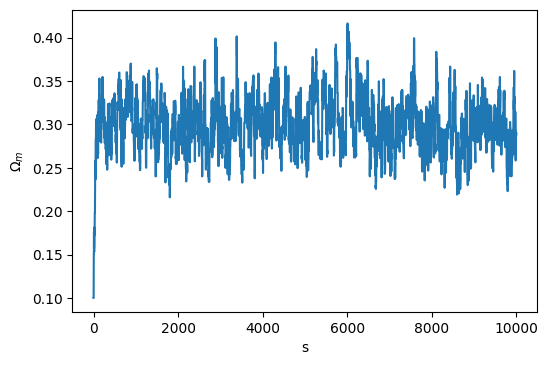

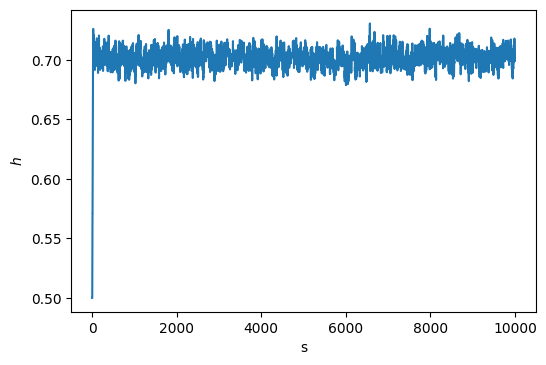

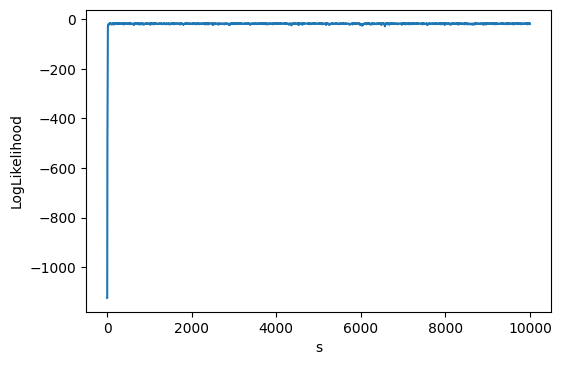

In [ ]:
s=10000
x=np.arange(0,s+1)
plt.figure(dpi=100)
plt.plot(x,Omf)
plt.xlabel('s')
plt.ylabel('$\Omega_m$')

plt.figure(dpi=100)
plt.plot(x,hf)
plt.xlabel('s')
plt.ylabel('$h$')

plt.figure(dpi=100)
plt.plot(np.arange(0,s),lfs)
plt.xlabel('s')
plt.ylabel('LogLikelihood')

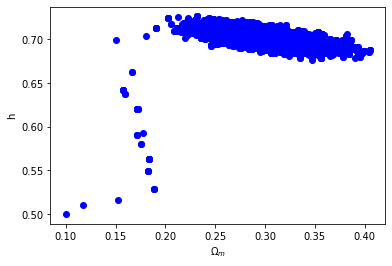

Mean of $\Omega_m$ =  0.2947736892957826
Mean of $h$      =  0.7026617126954462
Std of Omegam =  0.0307623824104018
Std of h      =  0.007057481748391005
Correlation    =  [[ 1.         -0.61213635]
 [-0.61213635  1.        ]]
Covariance =  [[ 0.0002171 -0.0001329]
 [-0.0001329  0.0002171]]


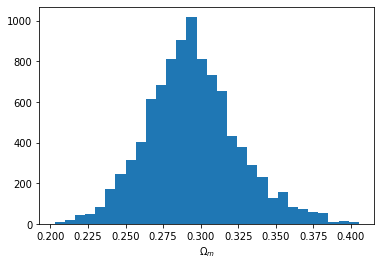

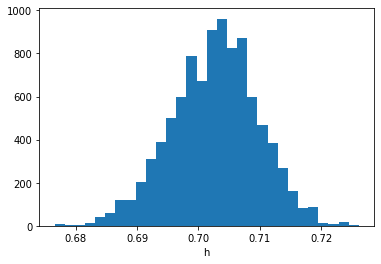

In [ ]:
Omf, hf, accept,lfs = Metropolis(0.1,0.5,s = 10000,sigma=0.018)
plt.plot(Omf,hf,'bo')
plt.xlabel('$\Omega_m$')
plt.ylabel('h')
plt.show()
del Omf[:500]
del hf[:500]
del lfs[:500]
Omf_mean = np.mean(Omf)
h_mean = np.mean(hf)
Omf_sigma = np.std(Omf)
h_sigma = np.std(hf)
print ('Mean of $\Omega_m$ = ',Omf_mean)
print ('Mean of $h$      = ',h_mean)
print ('Std of Omegam = ',Omf_sigma)
print ('Std of h      = ',h_sigma)
print ('Correlation    = ',np.corrcoef(Omf, hf))
covariance = np.corrcoef(Omf, hf) * (np.sqrt((Omf_sigma**2)*(h_sigma**2)))
print ('Covariance = ', covariance)
plt.hist(Omf,bins=30)
plt.xlabel(r'$\Omega_m$')
plt.show()

plt.hist(hf,bins=30)
plt.xlabel('h')
plt.show()

In [ ]:
accept

0.5088

Text(0, 0.5, 'LogLikelihood')

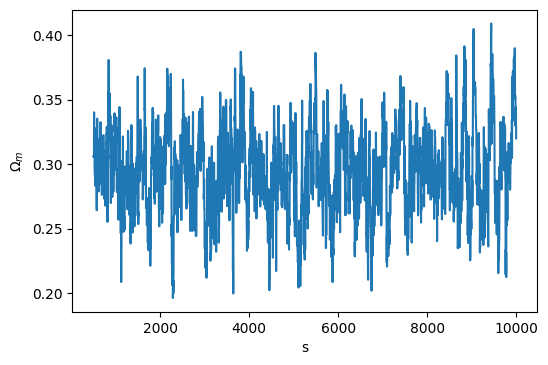

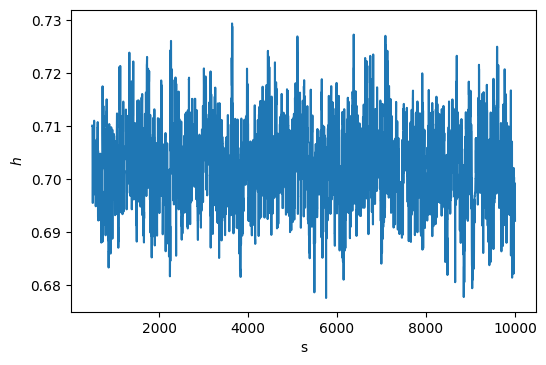

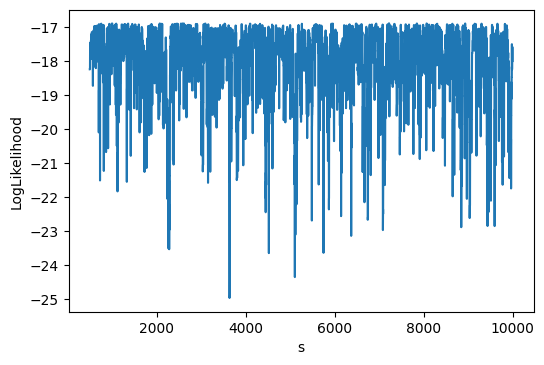

In [ ]:
s=10000
x=np.arange(500,s+1)
plt.figure(dpi=100)
plt.plot(x,Omf)
plt.xlabel('s')
plt.ylabel('$\Omega_m$')

plt.figure(dpi=100)
plt.plot(x,hf)
plt.xlabel('s')
plt.ylabel('$h$')

plt.figure(dpi=100)
plt.plot(np.arange(500,s),lfs)
plt.xlabel('s')
plt.ylabel('LogLikelihood')

In [ ]:
plt.figure(dpi = 100)

colors = np.linspace(0, 1, 600 + 1)
plt.scatter(Omf, hf, c = cm.viridis(colors), alpha = 0.7, s = 2)

In [ ]:
def plot_corr(y):
  cor = np.correlate(y, y, mode='full')
  x = np.arange(-len(cor)/2, len(cor)/2)
  #x=np.arange(len(cor))
  print(len(x))
  print(len(cor))
  plt.plot(x,cor)
  plt.xlabel('lags')
  plt.ylabel()
  plt.show()

In [ ]:
plot_corr(Omf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


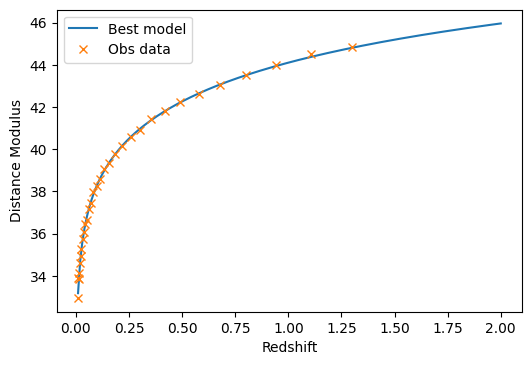

In [ ]:
z_arr = np.linspace(0, 2, 200)

plt.figure(dpi=100)
plt.xlabel('Redshift')
plt.ylabel('Distance Modulus')

theo_vals = []
for redshift in z_arr:
  theo_vals.append(Mu(redshift, Omf_mean, h_mean))

plt.plot(z_arr, theo_vals, label='Best model')

plt.plot(z, mu, marker='x', linestyle='None', label='Obs data')
plt.legend(loc='best')

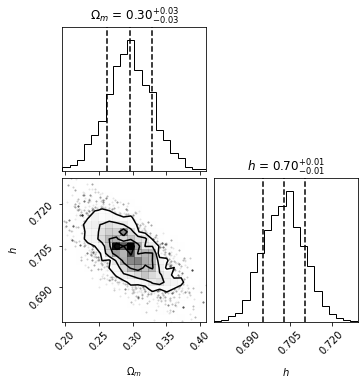

In [ ]:
data = np.zeros((len(Omf),2))
for i in range(len(Omf)):
    data[i,0] = Omf[i]
    data[i,1] = hf[i]

figure = corner.corner(data, labels=[r"$\Omega_m$",r"$h$",], quantiles=[0.16, 0.5, 0.84], show_titles=True, title_kwargs={"fontsize": 12},)

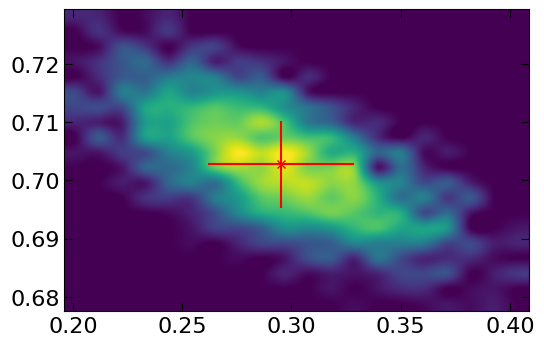

In [ ]:
fig, axs = plt.subplots(dpi = 100)

Nbin = 20
dens_factor = 10
cut = 500
dens_map, xedges, yedges = np.histogram2d(Omf[cut:], hf[cut:],
                                          bins=[Nbin, Nbin])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
axs.imshow(np.transpose(np.log10(dens_map + dens_factor)), extent=extent, origin='lower',
          cmap=cm.viridis, interpolation="spline16")
plt.errorbar(Omf_mean, h_mean, xerr = Omf_sigma, yerr=h_sigma, fmt='x', color = 'red')

axs.tick_params(axis='both', which='major', labelsize=16)
axs.tick_params(axis='both', which='both', direction='in', top=True, right=True, length=6)
axs.set_aspect('auto', adjustable='box')

Text(0, 0.5, '$h$')

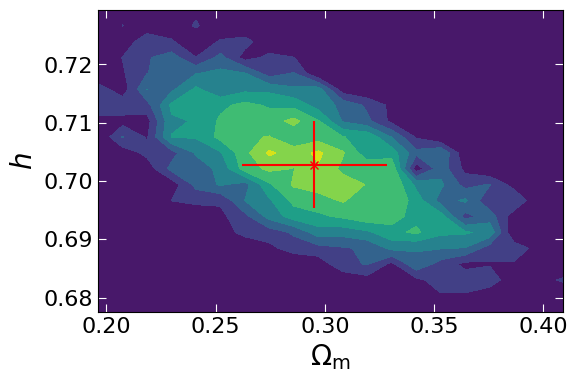

In [ ]:
fig, axs = plt.subplots(dpi = 100)

xs = np.linspace(xedges[0], xedges[-1], Nbin)
ys = np.linspace(yedges[0], yedges[-1], Nbin)

XX, YY = np.meshgrid(xs, ys)
ZZ = np.transpose(np.log10(dens_map + dens_factor))
cp = axs.contourf(XX, YY, ZZ)

axs.tick_params(axis='both', which='major', labelsize=16, color = 'white')
axs.tick_params(axis='both', which='both', direction='in', top=True, right=True, length=6)
axs.set_aspect('auto', adjustable='box')
plt.errorbar(Omf_mean, h_mean, xerr = Omf_sigma, yerr=h_sigma, fmt='x', color = 'red')

plt.xlabel(r'$\Omega_{\rm m}$', size = 20)
plt.ylabel(r'$h$', size = 20)